## The Data

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The dataset can be found from Kaggle:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<AxesSubplot:xlabel='price', ylabel='Count'>

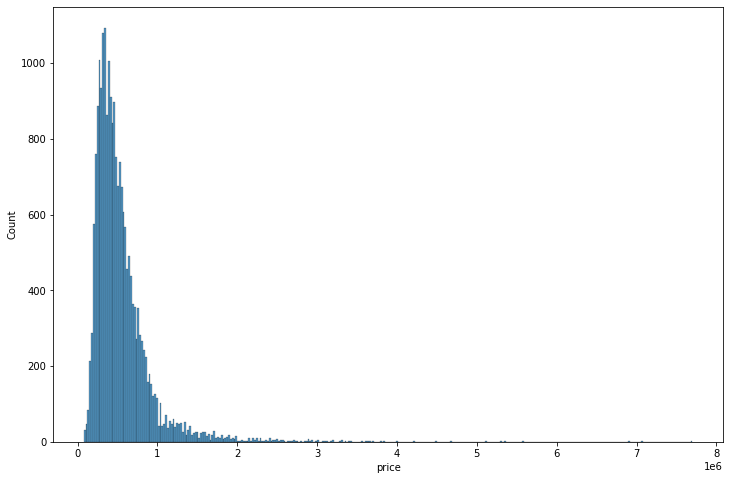

In [12]:
#sns.distplot(df['price'])
plt.figure(figsize=(12,8))
sns.histplot(df['price'])

E:\Anaconda3\envs\teece1env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

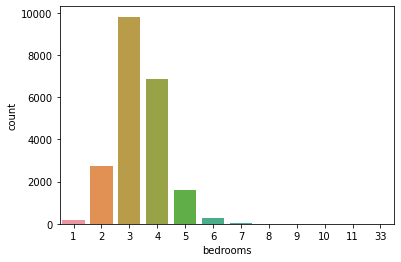

In [13]:
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

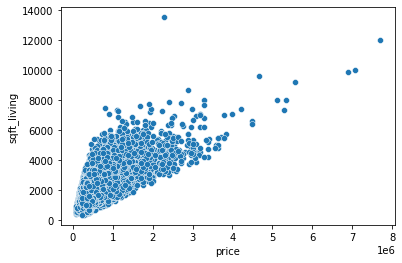

In [15]:
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

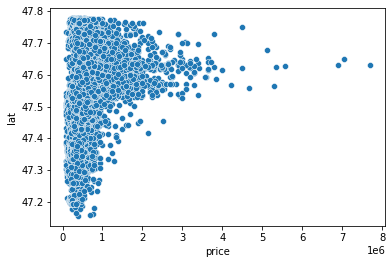

In [16]:
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

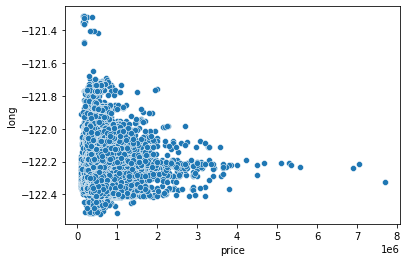

In [17]:
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

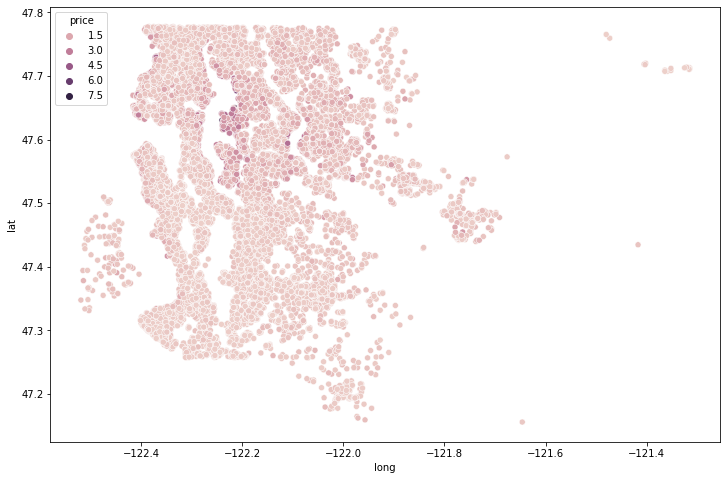

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [22]:
df.sort_values('price',ascending=False).head(20) #show the top 20 houses sold in terms price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [25]:
top_99_percent = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

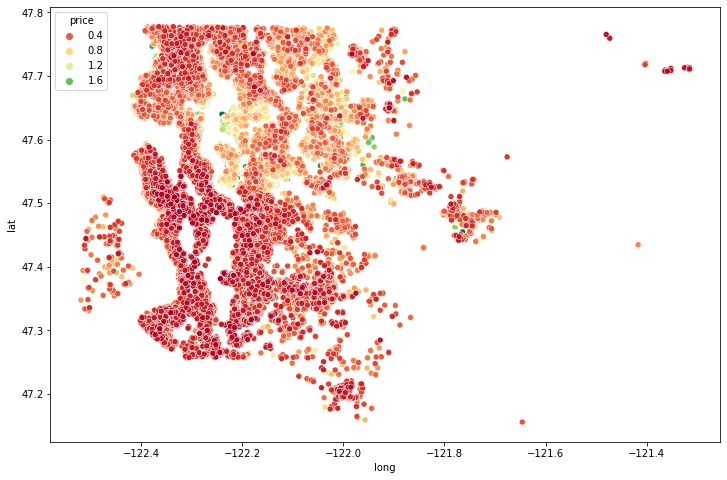

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=top_99_percent,hue='price', palette = 'RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

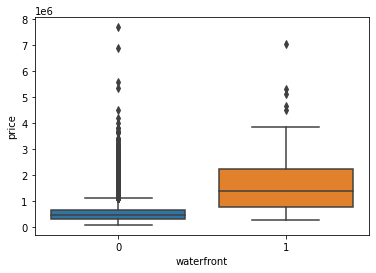

In [28]:
sns.boxplot(x='waterfront',y='price',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

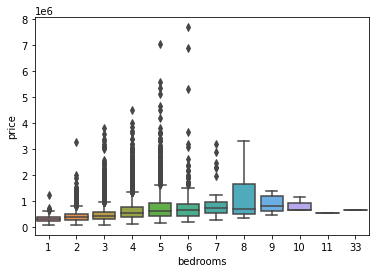

In [29]:
sns.boxplot(x='bedrooms',y='price',data=df)

<AxesSubplot:xlabel='price', ylabel='yr_built'>

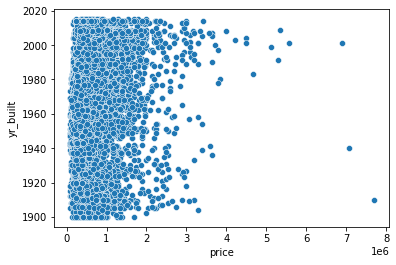

In [44]:
sns.scatterplot(x='price',y='yr_built',data=df)

# Feature Engineering

In [36]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [31]:
df = df.drop('id', axis = 1)

In [33]:
df['date'] = pd.to_datetime(df['date'])

In [35]:
#Create new column for month and year
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

In [37]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

In [38]:
df.groupby('year').mean()['price']

year
2014    539350.911777
2015    542279.005878
Name: price, dtype: float64

In [39]:
df = df.drop('date', axis = 1)

In [43]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [41]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [42]:
df = df.drop('zipcode', axis = 1)

# Scaling and Train Test Split

In [45]:
X = df.drop('price', axis = 1) #features
y = df['price'] #output

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
X_train= scaler.fit_transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [56]:
X_train.shape

(15117, 19)

In [57]:
X_test.shape

(6480, 19)

# Model Creation

In [58]:
from tensorflow.keras.models import Sequential #ANN
from tensorflow.keras.layers import Dense, Activation #Layers
from tensorflow.keras.optimizers import Adam #optimizer

In [59]:
#Build Model

model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

# Training the Model

In [65]:
model.fit(x = X_train, 
          y = y_train.values, 
          validation_data = (X_test, y_test.values),
          batch_size = 128,
          epochs = 400)

Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 430244593664.0000 - val_loss: 418936324096.0000
Epoch 2/400
119/119 [==============================] - 0s 910us/step - loss: 429297958912.0000 - val_loss: 415511609344.0000
Epoch 3/400
119/119 [==============================] - 0s 955us/step - loss: 414653710336.0000 - val_loss: 381290807296.0000
Epoch 4/400
119/119 [==============================] - 0s 896us/step - loss: 339150209024.0000 - val_loss: 258079686656.0000
Epoch 5/400
119/119 [==============================] - 0s 887us/step - loss: 186695860224.0000 - val_loss: 115619127296.0000
Epoch 6/400
119/119 [==============================] - 0s 947us/step - loss: 103803150336.0000 - val_loss: 94727225344.0000
Epoch 7/400
119/119 [==============================] - 0s 964us/step - loss: 97107714048.0000 - val_loss: 93198131200.0000
Epoch 8/400
119/119 [==============================] - 0s 913us/step - loss: 95410814976.0000 - val_loss: 91562983424.0000
Epoch 9

119/119 [==============================] - 0s 947us/step - loss: 38399524864.0000 - val_loss: 37195587584.0000
Epoch 68/400
119/119 [==============================] - 0s 913us/step - loss: 38239731712.0000 - val_loss: 37030350848.0000
Epoch 69/400
119/119 [==============================] - 0s 887us/step - loss: 38110253056.0000 - val_loss: 36867903488.0000
Epoch 70/400
119/119 [==============================] - 0s 947us/step - loss: 37893050368.0000 - val_loss: 36695216128.0000
Epoch 71/400
119/119 [==============================] - 0s 879us/step - loss: 37765083136.0000 - val_loss: 36520734720.0000
Epoch 72/400
119/119 [==============================] - 0s 938us/step - loss: 37605851136.0000 - val_loss: 36364255232.0000
Epoch 73/400
119/119 [==============================] - 0s 904us/step - loss: 37393362944.0000 - val_loss: 36228923392.0000
Epoch 74/400
119/119 [==============================] - 0s 847us/step - loss: 37227241472.0000 - val_loss: 35994251264.0000
Epoch 75/400
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 32999165952.0000 - val_loss: 31544162304.0000
Epoch 134/400
119/119 [==============================] - 0s 980us/step - loss: 32955877376.0000 - val_loss: 31538350080.0000
Epoch 135/400
119/119 [==============================] - 0s 947us/step - loss: 32959803392.0000 - val_loss: 31499843584.0000
Epoch 136/400
119/119 [==============================] - 0s 896us/step - loss: 32901568512.0000 - val_loss: 31464632320.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 32887003136.0000 - val_loss: 31434614784.0000
Epoch 138/400
119/119 [==============================] - 0s 904us/step - loss: 32856840192.0000 - val_loss: 31517888512.0000
Epoch 139/400
119/119 [==============================] - 0s 862us/step - loss: 32843694080.0000 - val_loss: 31404220416.0000
Epoch 140/400
119/119 [==============================] - 0s 887us/step - loss: 32892782592.0000 - val_loss: 31347619840.0000
Epoch 141/400
119/

119/119 [==============================] - 0s 913us/step - loss: 31562735616.0000 - val_loss: 29963821056.0000
Epoch 199/400
119/119 [==============================] - 0s 921us/step - loss: 31511179264.0000 - val_loss: 29944010752.0000
Epoch 200/400
119/119 [==============================] - 0s 909us/step - loss: 31490025472.0000 - val_loss: 29783406592.0000
Epoch 201/400
119/119 [==============================] - 0s 904us/step - loss: 31488772096.0000 - val_loss: 29762889728.0000
Epoch 202/400
119/119 [==============================] - 0s 876us/step - loss: 31444975616.0000 - val_loss: 29743927296.0000
Epoch 203/400
119/119 [==============================] - 0s 904us/step - loss: 31445315584.0000 - val_loss: 29714907136.0000
Epoch 204/400
119/119 [==============================] - 0s 926us/step - loss: 31422806016.0000 - val_loss: 29689606144.0000
Epoch 205/400
119/119 [==============================] - 0s 882us/step - loss: 31435307008.0000 - val_loss: 29666971648.0000
Epoch 206/400


Epoch 264/400
119/119 [==============================] - 0s 879us/step - loss: 30660583424.0000 - val_loss: 28807135232.0000
Epoch 265/400
119/119 [==============================] - 0s 887us/step - loss: 30658570240.0000 - val_loss: 28834965504.0000
Epoch 266/400
119/119 [==============================] - 0s 955us/step - loss: 30623852544.0000 - val_loss: 28804444160.0000
Epoch 267/400
119/119 [==============================] - 0s 879us/step - loss: 30567688192.0000 - val_loss: 28736022528.0000
Epoch 268/400
119/119 [==============================] - 0s 913us/step - loss: 30620086272.0000 - val_loss: 28686925824.0000
Epoch 269/400
119/119 [==============================] - 0s 887us/step - loss: 30612281344.0000 - val_loss: 28735459328.0000
Epoch 270/400
119/119 [==============================] - 0s 879us/step - loss: 30544545792.0000 - val_loss: 28696676352.0000
Epoch 271/400
119/119 [==============================] - 0s 938us/step - loss: 30618247168.0000 - val_loss: 28677873664.0000


119/119 [==============================] - 0s 1ms/step - loss: 30028902400.0000 - val_loss: 27939424256.0000
Epoch 330/400
119/119 [==============================] - 0s 854us/step - loss: 29979330560.0000 - val_loss: 27926401024.0000
Epoch 331/400
119/119 [==============================] - 0s 921us/step - loss: 29958711296.0000 - val_loss: 28138264576.0000
Epoch 332/400
119/119 [==============================] - 0s 930us/step - loss: 29969344512.0000 - val_loss: 27931779072.0000
Epoch 333/400
119/119 [==============================] - 0s 854us/step - loss: 29977450496.0000 - val_loss: 27930388480.0000
Epoch 334/400
119/119 [==============================] - 0s 930us/step - loss: 29958772736.0000 - val_loss: 27883333632.0000
Epoch 335/400
119/119 [==============================] - 0s 921us/step - loss: 29942026240.0000 - val_loss: 27928496128.0000
Epoch 336/400
119/119 [==============================] - 0s 887us/step - loss: 29960177664.0000 - val_loss: 27887132672.0000
Epoch 337/400
11

119/119 [==============================] - 0s 921us/step - loss: 29429477376.0000 - val_loss: 27260565504.0000
Epoch 395/400
119/119 [==============================] - 0s 879us/step - loss: 29450403840.0000 - val_loss: 27187048448.0000
Epoch 396/400
119/119 [==============================] - 0s 938us/step - loss: 29423970304.0000 - val_loss: 27209304064.0000
Epoch 397/400
119/119 [==============================] - 0s 883us/step - loss: 29389195264.0000 - val_loss: 27184234496.0000
Epoch 398/400
119/119 [==============================] - 0s 879us/step - loss: 29404592128.0000 - val_loss: 27148943360.0000
Epoch 399/400
119/119 [==============================] - 0s 947us/step - loss: 29407854592.0000 - val_loss: 27159928832.0000
Epoch 400/400
119/119 [==============================] - 0s 871us/step - loss: 29386655744.0000 - val_loss: 27153696768.0000


<AxesSubplot:>

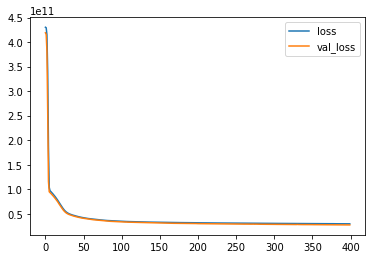

In [70]:
loses = pd.DataFrame(model.history.history)
loses.plot()

# Model Evaluation

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [78]:
predictions = model.predict(X_test)

In [81]:
mean_absolute_error(y_test,predictions)

101676.22553047839

In [83]:
df['price'].mean()

540296.5735055795

In [84]:
explained_variance_score(y_test,predictions)

0.7952600910662313

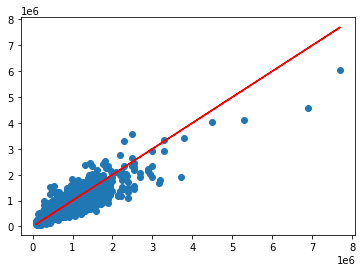

In [86]:
# Our predictions
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')

# Predicting the Price of a New House

In [101]:
single_house = df.drop('price',axis=1).iloc[0]
single_house = single_house.values.reshape(-1,19)

In [102]:
single_house_scaled = scaler.transform(single_house)

E:\Anaconda3\envs\teece1env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [103]:
model.predict(single_house_scaled)

array([[281833.22]], dtype=float32)

In [104]:
221900.0

221900.0